In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [119]:
df = pd.read_csv('./tweets.csv')
df.date = pd.to_datetime(df.date)
df = df[~df.text.str.startswith('rt ')]
df = df[~df.text.str.startswith('RT')]

In [120]:
df.head()

,Unnamed: 0,date,text,author
0,0,2016-10-14,Denying climate change is dangerous. Join @OFA...,BarackObama
1,1,2016-10-14,The American Bar Association gave Judge Garlan...,BarackObama
2,2,2016-10-14,We need a fully functional Supreme Court. Edit...,BarackObama
3,3,2016-10-14,"Cynics, take note: When we #ActOnClimate, we b...",BarackObama
4,4,2016-10-13,"""That’s how we will overcome the challenges we...",BarackObama


In [121]:
df.groupby('author').author.count()

author
BarackObama        9126
DonaldTrump       14310
HillaryClinton     5654
Name: author, dtype: int64

Mohit - create features 

In [122]:
def hasExclamation(x): 
    if '!' in x: 
        return True
    else: 
        return False

df['hasExclamation'] = df.text.apply(hasExclamation)

In [123]:
from string import ascii_uppercase
def countCaps(x): 
    c = 0
    for letter in x: 
        if letter in ascii_uppercase: 
            c+=1 
    return c

df['countCaps'] = df.text.apply(countCaps)

In [124]:
def globalWarming(x): 
    if 'global warming' in x.lower():
        return True
    else: 
        return False
df['globalWarming'] = df.text.apply(globalWarming)

In [125]:
def climateChange(x): 
    if 'climate change' in x.lower():
        return True
    else: 
        return False 
df['climateChange'] = df.text.apply(climateChange)

In [126]:
print (df[(df.author == 'BarackObama') & (df.climateChange == 1)].shape[0],
    df[(df.author == 'DonaldTrump') & (df.climateChange == 1)].shape[0],
    df[(df.author == 'HillaryClinton') & (df.climateChange == 1)].shape[0],
    '\n',
    df[(df.author == 'BarackObama') & (df.globalWarming == 1)].shape[0],
    df[(df.author == 'DonaldTrump') & (df.globalWarming == 1)].shape[0],
    df[(df.author == 'HillaryClinton') & (df.globalWarming == 1)].shape[0])

304 29 50 
 0 86 1


In [127]:
def hasAt(x): 
    if '@' in x: 
        return True 
    else: 
        return False

df['hasAt'] = df.text.apply(hasAt)

In [128]:
def hasHashtag(x): 
    if '#' in x: 
        return True
    else: 
        return False

df['hasHashtag'] = df.text.apply(hasHashtag)

In [129]:
def hasRepub(x): 
    if 'republican' in x.lower(): 
        return True 
    else: 
        return False

df['hasRepub'] = df.text.apply(hasRepub)

In [130]:
def charCount(x): 
    return len(x)

df['charCount'] = df.text.apply(charCount)

In [131]:
def hasDemo(x): 
    if 'democrat' in x: 
        return True
    else: 
        return False

df['hasDemo'] = df.text.apply(hasDemo)

In [132]:
def hasObama(x): 
    if 'obama' in x.lower():
        return True
    else: 
        return False
    
def hasHillary(x): 
    if 'hillary' in x.lower(): 
        return True
    else: 
        return False
    
def hasTrump(x): 
    if 'trump' in x.lower(): 
        return True
    else: 
        return False

df['hasObama'] = df.text.apply(hasObama)
df['hasHillary'] = df.text.apply(hasHillary)
df['hasTrump'] = df.text.apply(hasTrump)

In [133]:
df.head(2)

,Unnamed: 0,date,text,author,hasExclamation,countCaps,globalWarming,climateChange,hasAt,hasHashtag,hasRepub,charCount,hasDemo,hasObama,hasHillary,hasTrump
0,0,2016-10-14,Denying climate change is dangerous. Join @OFA...,BarackObama,False,12,False,True,True,True,False,130,False,False,False,False
1,1,2016-10-14,The American Bar Association gave Judge Garlan...,BarackObama,False,19,False,False,False,True,False,150,False,False,False,False


In [134]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

df_bo_dt = df[df.author != 'HillaryClinton']

clf = tree.DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, df_bo_dt.iloc[:, 4:], df_bo_dt.author, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
pd.DataFrame([scores, df.columns[4:].values], index = ['score', 'feature'])

Accuracy: 0.81 (+/- 0.12)


,0,1,2,3,4,5,6,7,8,9,10,11
score,0.888652,0.886092,0.866041,0.823379,0.775171,0.799061,0.699531,0.716603,0.8344,0.828425,None,None
feature,hasExclamation,countCaps,globalWarming,climateChange,hasAt,hasHashtag,hasRepub,charCount,hasDemo,hasObama,hasHillary,hasTrump


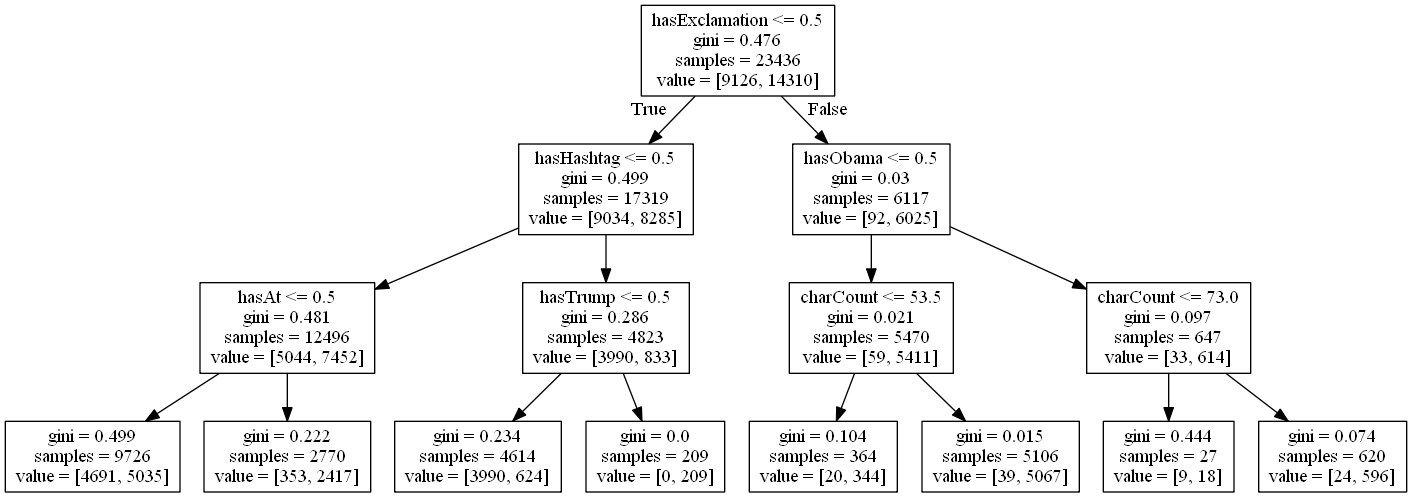

In [135]:
### Fit Decision Tree ###

split =  int(df.shape[0]* 0.9)

clf = tree.DecisionTreeClassifier(random_state=0, 
                                 max_depth=3)

clf = clf.fit(X = df_bo_dt.iloc[:split, 4:],
              y = df_bo_dt.author[:split])

### Visualize ###
dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(clf, out_file = dotfile, feature_names = df_bo_dt.iloc[:, 4:].columns)
dotfile.close()
!dot -Tpng dtree2.dot -o tree.png

from IPython.display import Image 
Image(filename='tree.png')

In [136]:
#scores  
test_split = -int(df.shape[0]*0.1)
score = clf.score(X = df_bo_dt.iloc[test_split:, 4:],
                  y = df_bo_dt.author[test_split:])

print ('{0:.3g}% mean accuracy - test'.format(score*100))

91.6% mean accuracy - test


2909

Histogram of Dates

In [22]:
gba_date_cal = df.groupby('author').date_cal

author
BarackObama       Axes(0.125,0.125;0.775x0.755)
DonaldTrump       Axes(0.125,0.125;0.775x0.755)
HillaryClinton    Axes(0.125,0.125;0.775x0.755)
Name: date_cal, dtype: object

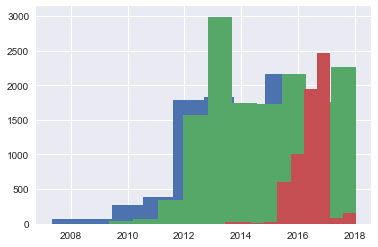

In [29]:
gba_date_cal.hist(stacked=True, histtype='step', )

# Nate

In [209]:
from sklearn.feature_extraction.text import CountVectorizer

In [235]:
def print_most_indicative(author, n=20, min_df=100):
    cv_full = CountVectorizer(min_df=min_df, stop_words='english')
    
    full_text = cv_full.fit_transform(df.text)
    full_vocab_use = full_text.sum(0).astype('float64')
    
    df_a  = df[df.author == author]
    a_text = cv_full.transform(df_a.text)
    a_vocab_use = a_text.sum(0).astype('float64')
    
    a_relative_vocab_use = a_vocab_use / full_vocab_use
    a_relative_vocab_use = np.array(a_relative_vocab_use).reshape(-1)
    
    rev_vocab = dict([ (v, k) for k, v in cv_full.vocabulary_.iteritems( ) ])
    
    a_most_indicative = np.argsort(-a_relative_vocab_use)
    a_most_used = np.argsort(-a_vocab_use)
    
    print 'Most indicative'
    for i in range(n):
        print rev_vocab[a_most_indicative[i]]
        print a_vocab_use[0, a_most_indicative[i]]
        print full_vocab_use[0, a_most_indicative[i]]
        
    print
    print 'Most used'
    for i in range(n):
        print rev_vocab[a_most_used[0, i]]
        print a_vocab_use[0, a_most_used[0, i]]
        print full_vocab_use[0, a_most_used[0, i]]
        
      

In [236]:
print_most_indicative('BarackObama', n=5)

In [237]:
print_most_indicative('HillaryClinton', n=5)

In [240]:
print_most_indicative('DonaldTrump', n=5)

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [173]:
tfidf_full = TfidfVectorizer(min_df=10)

In [174]:
full_text = tfidf_full.fit_transform(df.text)
full_vocab_use = full_text.sum(0).astype('float64')

df_bo  = df[df.author == 'BarackObama']

bo_text = tfidf_full.transform(df_bo.text)
bo_vocab_use = bo_text.sum(0).astype('float64')

bo_relative_vocab_use = bo_vocab_use / full_vocab_use
bo_relative_vocab_use = np.array(bo_relative_vocab_use).reshape(-1)

rev_vocab = dict([ (v, k) for k, v in tfidf_full.vocabulary_.iteritems( ) ])

bo_most_indicative = np.argsort(-bo_relative_vocab_use)

In [182]:
for i in range(20):
    print rev_vocab[bo_most_indicative[i]]
    print bo_vocab_use[0, bo_most_indicative[i]]

In [177]:
bo_most_indicative_scores[:51].shape

(51,)

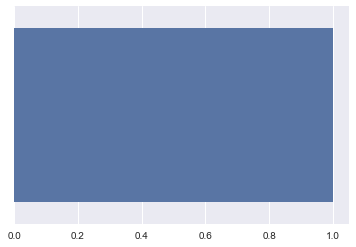

In [178]:
sns.barplot(bo_most_indicative_scores[:50].reshape(1, 50))

In [179]:
bo_most_indicative_scores[:50].reshape(1, 50)[0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [37]:
# find the word frequencies in obama, trump and clinton tweets

df_author  = df[df.author == 'BarackObama']

for row in df_author.text:
    print row
    break

# End Nate

# Start Amadeus

In [4]:
http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction


In [68]:
df = df[~df.text.str.startswith('rt ')]

Histograms

In [ ]:
['date_cal'].hist()

In [39]:
df.author.unique()

array(['BarackObama', 'DonaldTrump', 'HillaryClinton'], dtype=object)

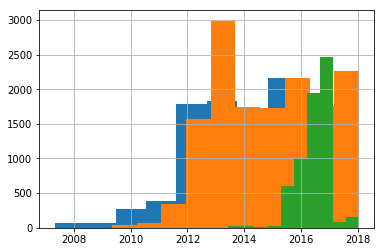

In [40]:
df[df.author == 'BarackObama']['date_cal'].hist()
df[df.author == 'DonaldTrump']['date_cal'].hist()
df[df.author == 'HillaryClinton']['date_cal'].hist()

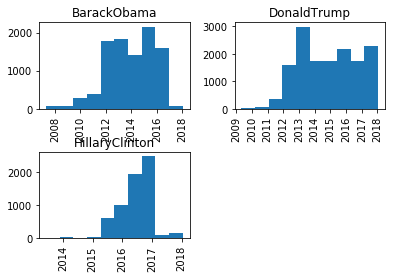

In [53]:
df['date_cal'].hist(df.author)

In [54]:
df.date

0       2016-10-14 00:00:00
1       2016-10-14 00:00:00
2       2016-10-14 00:00:00
3       2016-10-14 00:00:00
4       2016-10-13 00:00:00
5       2016-10-13 00:00:00
6       2016-10-13 00:00:00
7       2016-10-12 00:00:00
8       2016-10-12 00:00:00
9       2016-10-12 00:00:00
10      2016-10-12 00:00:00
11      2016-10-11 00:00:00
12      2016-10-11 00:00:00
13      2016-10-11 00:00:00
14      2016-10-11 00:00:00
15      2016-10-11 00:00:00
16      2016-10-07 00:00:00
17      2016-10-07 00:00:00
18      2016-10-07 00:00:00
19      2016-10-07 00:00:00
20      2016-10-04 00:00:00
21      2016-10-03 00:00:00
22      2016-09-30 00:00:00
23      2016-09-30 00:00:00
24      2016-09-30 00:00:00
25      2016-09-29 00:00:00
26      2016-09-28 00:00:00
27      2016-09-27 00:00:00
28      2016-09-27 00:00:00
29      2016-09-26 00:00:00
                ...        
30651   2016-07-26 21:40:34
30652   2016-07-26 21:37:51
30653   2016-07-26 21:32:05
30654   2016-07-26 21:19:43
30655   2016-07-26 2